# Machine Learning Project: Predicting Strokes

**REQUIREMENTS FOR MIDTERM REPORT**
* 1+ Data Preprocessing Method Implemented✅
* 1+ ML Algorithms/Models Implemented✅
* Supervised Learning or Unsupervised Method Implemented (Supervised is highly recommended) ✅
* Visualizations✅
* Quantitative Metrics✅
* Analysis of 1+ Algorithm/Model✅
* Next Steps✅
* All the stuff thats already on the proposal report✅
* update gantt and resposibility chart
* put on streamlit again

*Once you complete a test please put a check mark ✅*

## Data Preprocessing using panda

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Load the stroke dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()
print(f"Removed {df.shape[0] - df_no_duplicates.shape[0]} duplicate rows")

# Convert 'N/A' to NaN in the bmi column
df_no_duplicates['bmi'] = df_no_duplicates['bmi'].replace('N/A', np.nan).astype(float)

# Count missing values before filling
missing_age = df_no_duplicates['age'].isna().sum()
missing_bmi = df_no_duplicates['bmi'].isna().sum()
missing_glucose = df_no_duplicates['avg_glucose_level'].isna().sum()

# Calculate medians for age and glucose
age_median = df_no_duplicates['age'].median()
glucose_median = df_no_duplicates['avg_glucose_level'].median()

# Calculate gender-specific BMI medians
male_bmi_median = df_no_duplicates[df_no_duplicates['gender'] == 'Male']['bmi'].median()
female_bmi_median = df_no_duplicates[df_no_duplicates['gender'] == 'Female']['bmi'].median()
overall_bmi_median = df_no_duplicates['bmi'].median()  # For any other gender category

# Fill missing values with appropriate medians
df_no_duplicates['age'] = df_no_duplicates['age'].fillna(age_median)
df_no_duplicates['avg_glucose_level'] = df_no_duplicates['avg_glucose_level'].fillna(glucose_median)

# Fill BMI based on gender
df_no_duplicates.loc[(df_no_duplicates['bmi'].isna()) & (df_no_duplicates['gender'] == 'Male'), 'bmi'] = male_bmi_median
df_no_duplicates.loc[(df_no_duplicates['bmi'].isna()) & (df_no_duplicates['gender'] == 'Female'), 'bmi'] = female_bmi_median
df_no_duplicates.loc[(df_no_duplicates['bmi'].isna()), 'bmi'] = overall_bmi_median  # For any remaining NaN values


# Print how many missing values were replaced for each column
print(f"Replaced {missing_age} missing values in Age column")
print(f"Replaced {missing_bmi} missing values in BMI column (Male median: {male_bmi_median:.2f}, Female median: {female_bmi_median:.2f})")
print(f"Replaced {missing_glucose} missing values in Glucose Level column")




Removed 0 duplicate rows
Replaced 0 missing values in Age column
Replaced 201 missing values in BMI column (Male median: 28.40, Female median: 27.80)
Replaced 0 missing values in Glucose Level column


### changing to binary and multiclass values

In [4]:
## change the gender column to binary values
df_no_duplicates['gender'] = df_no_duplicates['gender'].map({'Female': 0, 'Male': 2, 'Other': 1})

## change the ever_married column to binary values
df_no_duplicates['ever_married'] = df_no_duplicates['ever_married'].map({'No': 0, 'Yes': 1})

##change work_type column to multi class values
df_no_duplicates['work_type'] = df_no_duplicates['work_type'].map({'Govt_job': 0,'Private': 1, 'Self-employed': 2, 'children': 3, 'Never_worked': 4})

## change residence_type column to binary values
df_no_duplicates['Residence_type'] = df_no_duplicates['Residence_type'].map({'Urban': 0, 'Rural': 1})

## change smoking_status column to multi class values
df_no_duplicates['smoking_status'] = df_no_duplicates['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3})



### save to new csv

In [5]:
# Save the processed data to a new CSV file
output_file = 'processed_stroke_data.csv'
df_no_duplicates.to_csv(output_file, index=False)
print(f"Processed data saved to {output_file}")
print(f"Filled missing values with medians - Age: {age_median}, Glucose: {glucose_median}")

Processed data saved to processed_stroke_data.csv
Filled missing values with medians - Age: 45.0, Glucose: 91.88499999999999


## ______ model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import class_likelihood_ratios
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Naive Bayes using all features
feature_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
X_dataset = pd.read_csv('processed_stroke_data.csv', usecols=feature_columns)
y_columns = ['stroke']
y_dataset = pd.read_csv('processed_stroke_data.csv', usecols=y_columns)

scaler = StandardScaler()
X_dataset_normalized = scaler.fit_transform(X_dataset)

y_columns = ['stroke']
y_dataset = pd.read_csv('processed_stroke_data.csv', usecols=y_columns)

X_train, X_test, y_train, y_test = train_test_split(X_dataset_normalized, y_dataset, test_size=0.7, random_state=0)
gaussian_orig = GaussianNB()

y_pred = gaussian_orig.fit(X_train, y_train).predict(X_test)

y_test_r = np.ravel(y_test)
print("%d mislabeled points out of a total of %d points" % ((y_test_r != y_pred).sum(), X_test.shape[0]))

acc_orig = accuracy_score(y_test, y_pred)
print("Accuracy score: %f" % (acc_orig))

f1_orig = f1_score(y_test, y_pred)
print("F1 score: %f" % (f1_orig))

prec_orig = precision_score(y_test, y_pred)
print("Precision score: %f" % (prec_orig))

rec_orig = recall_score(y_test, y_pred)
print("Recall score: %f" % (rec_orig))

class_orig = class_likelihood_ratios(y_test, y_pred, labels=[0,1])
print("LR+: %f" % (class_orig[0]))
print("LR-: %f" % (class_orig[1]))

457 mislabeled points out of a total of 3577 points
Accuracy score: 0.872239
F1 score: 0.237062
Precision score: 0.163972
Recall score: 0.427711
LR+: 4.030170
LR-: 0.640236


c:\Users\tchev\.conda\envs\ml_hw2_env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
# Naive Bayes feature reduced variant 1 (remove features with little effect)
feature_columns = ['age', 'hypertension', 'ever_married', 'work_type', 'avg_glucose_level', 'bmi']
X_dataset = pd.read_csv('processed_stroke_data.csv', usecols=feature_columns)
y_columns = ['stroke']
y_dataset = pd.read_csv('processed_stroke_data.csv', usecols=y_columns)

scaler = StandardScaler()
X_dataset_normalized = scaler.fit_transform(X_dataset)

y_columns = ['stroke']
y_dataset = pd.read_csv('processed_stroke_data.csv', usecols=y_columns)

X_train, X_test, y_train, y_test = train_test_split(X_dataset_normalized, y_dataset, test_size=0.7, random_state=0)

gaussian_orig = GaussianNB()

y_pred = gaussian_orig.fit(X_train, y_train).predict(X_test)

y_test_r = np.ravel(y_test)
print("%d mislabeled points out of a total of %d points" % ((y_test_r != y_pred).sum(), X_test.shape[0]))

acc_var1 = accuracy_score(y_test, y_pred)
print("Accuracy score: %f" % (acc_var1))

f1_var1 = f1_score(y_test, y_pred)
print("F1 score: %f" % (f1_var1))

prec_var1 = precision_score(y_test, y_pred)
print("Precision score: %f" % (prec_var1))

rec_var1 = recall_score(y_test, y_pred)
print("Recall score: %f" % (rec_var1))

class_var1 = class_likelihood_ratios(y_test, y_pred, labels=[0,1])
print("LR+: %f" % (class_var1[0]))
print("LR-: %f" % (class_var1[1]))

416 mislabeled points out of a total of 3577 points
Accuracy score: 0.883701
F1 score: 0.246377
Precision score: 0.176166
Recall score: 0.409639


c:\Users\tchev\.conda\envs\ml_hw2_env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR+: 4.393953
LR-: 0.651058


In [8]:


# Naive Bayes feature reduced variant 2 (highest accuracy)
feature_columns = ['age', 'hypertension', 'bmi', 'smoking_status']
X_dataset = pd.read_csv('processed_stroke_data.csv', usecols=feature_columns)

scaler = StandardScaler()
X_dataset_normalized = scaler.fit_transform(X_dataset)

y_columns = ['stroke']
y_dataset = pd.read_csv('processed_stroke_data.csv', usecols=y_columns)

X_train, X_test, y_train, y_test = train_test_split(X_dataset_normalized, y_dataset, test_size=0.7, random_state=0)

gaussian_orig = GaussianNB()

y_pred = gaussian_orig.fit(X_train, y_train).predict(X_test)

y_test_r = np.ravel(y_test)
print("%d mislabeled points out of a total of %d points" % ((y_test_r != y_pred).sum(), X_test.shape[0]))

acc_var2 = accuracy_score(y_test, y_pred)
print("Accuracy score: %f" % (acc_var2))

f1_var2 = f1_score(y_test, y_pred)
print("F1 score: %f" % (f1_var2))

prec_var2 = precision_score(y_test, y_pred)
print("Precision score: %f" % (prec_var2))

rec_var2 = recall_score(y_test, y_pred)
print("Recall score: %f" % (rec_var2))

class_var2 = class_likelihood_ratios(y_test, y_pred, labels=[0,1])
print("LR+: %f" % (class_var2[0]))
print("LR-: %f" % (class_var2[1]))

364 mislabeled points out of a total of 3577 points
Accuracy score: 0.898239
F1 score: 0.191111
Precision score: 0.151408
Recall score: 0.259036
LR+: 3.666275
LR-: 0.797296


c:\Users\tchev\.conda\envs\ml_hw2_env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


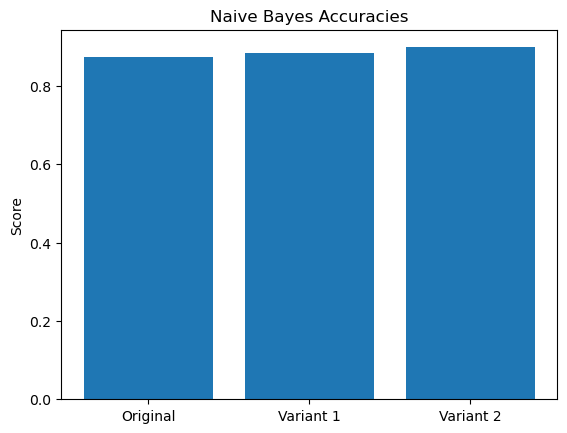

In [9]:
variants = ['Original', 'Variant 1', 'Variant 2']
accuracies = [acc_orig, acc_var1, acc_var2]

plt.bar(variants, accuracies)
plt.title('Naive Bayes Accuracies')
plt.ylabel('Score')
plt.show()

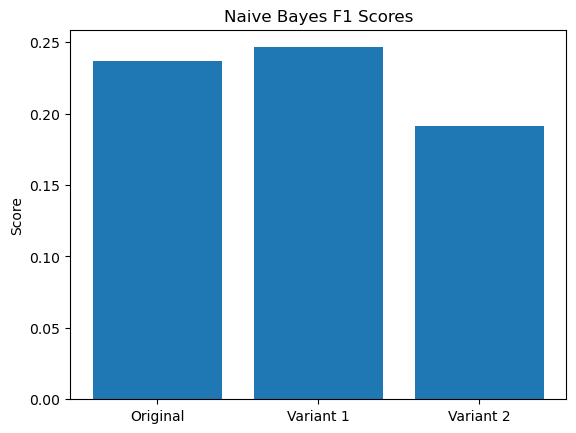

In [10]:
variants = ['Original', 'Variant 1', 'Variant 2']
f1_scores = [f1_orig, f1_var1, f1_var2]

plt.bar(variants, f1_scores)
plt.title('Naive Bayes F1 Scores')
plt.ylabel('Score')
plt.show()

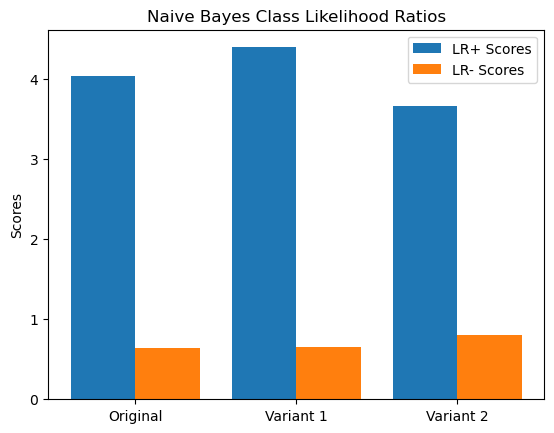

In [11]:
variants = ['Original', 'Variant 1', 'Variant 2']
LRp_scores = [class_orig[0], class_var1[0], class_var2[0]]
LRm_scores = [class_orig[1], class_var1[1], class_var2[1]]

w, x = 0.4, np.arange(len(variants))

fig, ax = plt.subplots()
ax.bar(x-w/2, LRp_scores, width=w, label="LR+ Scores")
ax.bar(x+w/2, LRm_scores, width=w, label="LR- Scores")

ax.set_xticks(x)
ax.set_xticklabels(variants)
ax.set_ylabel("Scores")
ax.set_title("Naive Bayes Class Likelihood Ratios")
ax.legend()

plt.show()

##  Visualizations and Quantitative Metrics

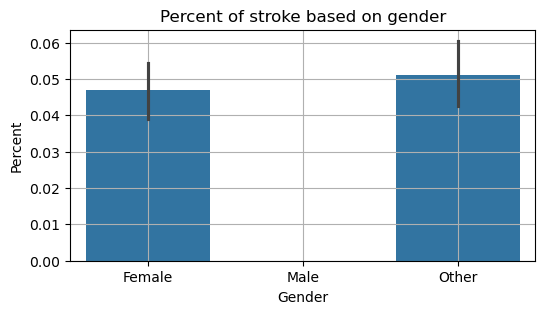

In [12]:
# Woohoo!

processed_stroke_data = pd.read_csv("processed_stroke_data.csv")
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

gender_indexes = [0, 1, 2]
gender_labels = ['Female', 'Male', 'Other']
sns.barplot(data=processed_stroke_data, x='gender', y='stroke')
plt.xticks(gender_indexes, gender_labels)
ax.set_title('Percent of stroke based on gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Percent')
ax.grid(True)

C:\Users\tchev\AppData\Local\Temp\ipykernel_23032\131327072.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_percents = (processed_stroke_data.groupby('age_bin')['stroke'].mean())


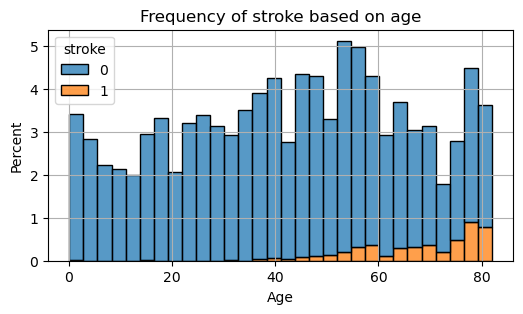

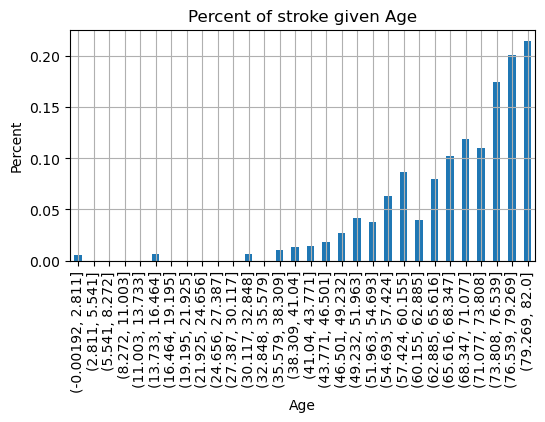

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6,3))

sns.histplot(data=processed_stroke_data, x='age', hue='stroke', stat='percent', bins=30, multiple='stack')
ax.set_title('Frequency of stroke based on age')
ax.set_xlabel('Age')
ax.set_ylabel('Percent')
ax.grid(True)

processed_stroke_data['age_bin'] = pd.cut(processed_stroke_data['age'], bins=30)
stroke_percents = (processed_stroke_data.groupby('age_bin')['stroke'].mean())

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
stroke_percents.plot(kind='bar')
ax.set_title('Percent of stroke given Age')
ax.set_xlabel('Age')
ax.set_ylabel('Percent')
ax.grid(True)

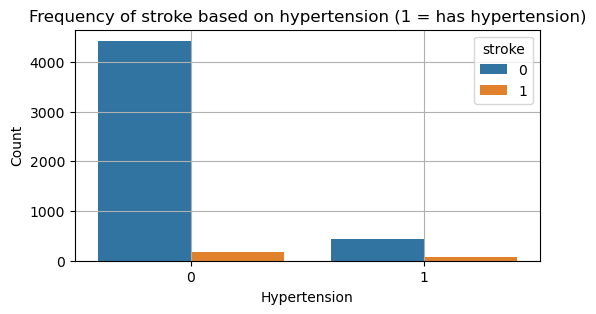

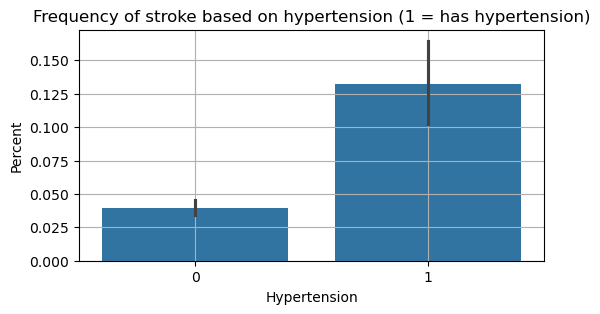

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6,3))

sns.countplot(data=processed_stroke_data, x='hypertension', hue='stroke')
ax.set_title('Frequency of stroke based on hypertension (1 = has hypertension)')
ax.set_xlabel('Hypertension')
ax.set_ylabel('Count')
ax.grid(True)


fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.barplot(data=processed_stroke_data, x='hypertension', y='stroke')
ax.set_title('Frequency of stroke based on hypertension (1 = has hypertension)')
ax.set_xlabel('Hypertension')
ax.set_ylabel('Percent')
ax.grid(True)

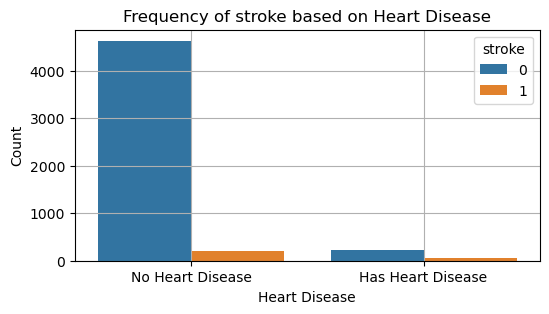

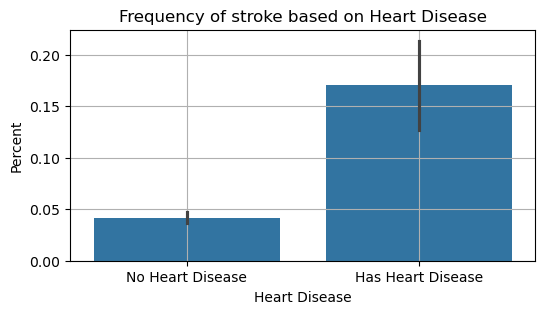

In [15]:
x_indexes = [0, 1]
x_labels = ['No Heart Disease', 'Has Heart Disease']
fig, ax = plt.subplots(1, 1, figsize=(6,3))
plt.xticks(x_indexes, x_labels)
sns.countplot(data=processed_stroke_data, x='heart_disease', hue='stroke')
ax.set_title('Frequency of stroke based on Heart Disease')
ax.set_xlabel('Heart Disease')
ax.set_ylabel('Count')
ax.grid(True)

fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.barplot(data=processed_stroke_data, x='heart_disease', y='stroke')
plt.xticks(x_indexes, x_labels)
ax.set_title('Frequency of stroke based on Heart Disease')
ax.set_xlabel('Heart Disease')
ax.set_ylabel('Percent')
ax.grid(True)

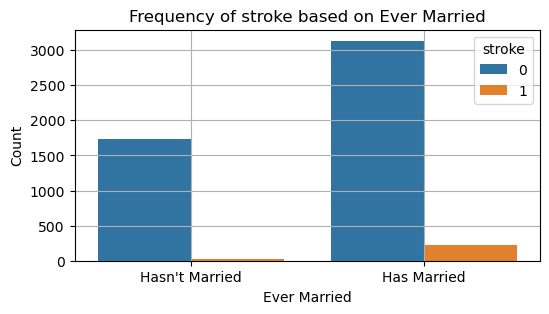

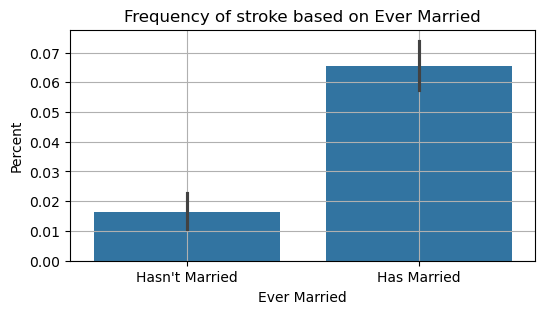

In [16]:
x_indexes = [0, 1]
x_labels = ["Hasn't Married", "Has Married"]
fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.countplot(data=processed_stroke_data, x='ever_married', hue='stroke')
plt.xticks(x_indexes, x_labels)
ax.set_title('Frequency of stroke based on Ever Married')
ax.set_xlabel('Ever Married')
ax.set_ylabel('Count')
ax.grid(True)

fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.barplot(data=processed_stroke_data, x='ever_married', y='stroke')
plt.xticks(x_indexes, x_labels)
ax.set_title('Frequency of stroke based on Ever Married')
ax.set_xlabel('Ever Married')
ax.set_ylabel('Percent')
ax.grid(True)

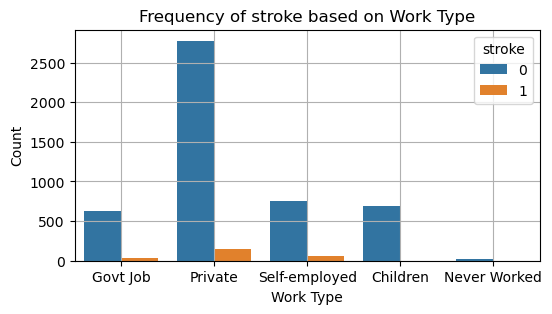

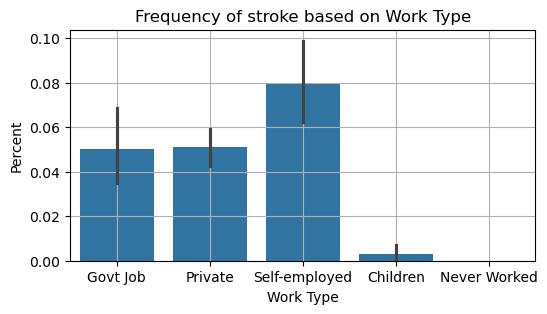

In [17]:
x_indexes=[0, 1, 2, 3, 4]
x_labels=['Govt Job', 'Private', 'Self-employed', 'Children', 'Never Worked']
fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.countplot(data=processed_stroke_data, x='work_type', hue='stroke')
plt.xticks(x_indexes, x_labels)
ax.set_title('Frequency of stroke based on Work Type')
ax.set_xlabel('Work Type')
ax.set_ylabel('Count')
ax.grid(True)

fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.barplot(data=processed_stroke_data, x='work_type', y='stroke')
plt.xticks(x_indexes, x_labels)
ax.set_title('Frequency of stroke based on Work Type')
ax.set_xlabel('Work Type')
ax.set_ylabel('Percent')
ax.grid(True)

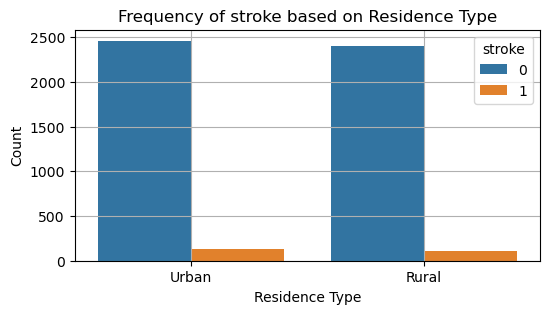

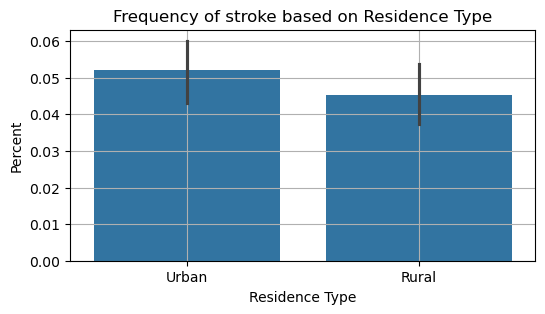

In [18]:
x_indexes = [0, 1]
x_labels = ['Urban', 'Rural']
fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.countplot(data=processed_stroke_data, x='Residence_type', hue='stroke')
plt.xticks(x_indexes, x_labels)
ax.set_title('Frequency of stroke based on Residence Type')
ax.set_xlabel('Residence Type')
ax.set_ylabel('Count')
ax.grid(True)

fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.barplot(data=processed_stroke_data, x='Residence_type', y='stroke')
plt.xticks(x_indexes, x_labels)
ax.set_title('Frequency of stroke based on Residence Type')
ax.set_xlabel('Residence Type')
ax.set_ylabel('Percent')
ax.grid(True)

C:\Users\tchev\AppData\Local\Temp\ipykernel_23032\4140921298.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_percents = (processed_stroke_data.groupby('avg_glucose_level_bin')['stroke'].mean())


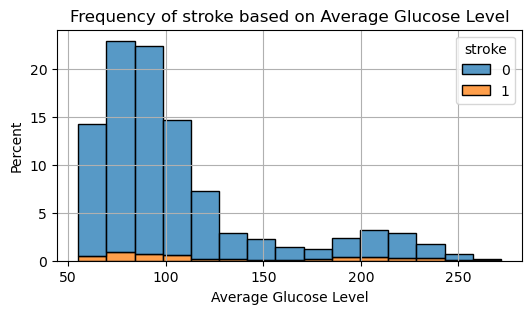

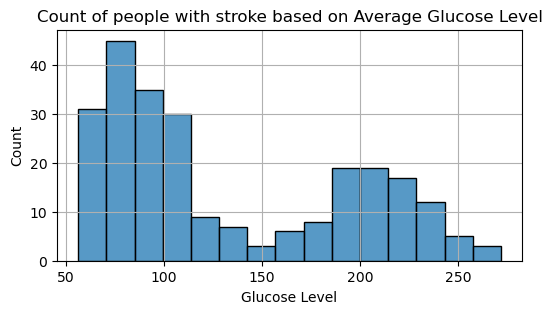

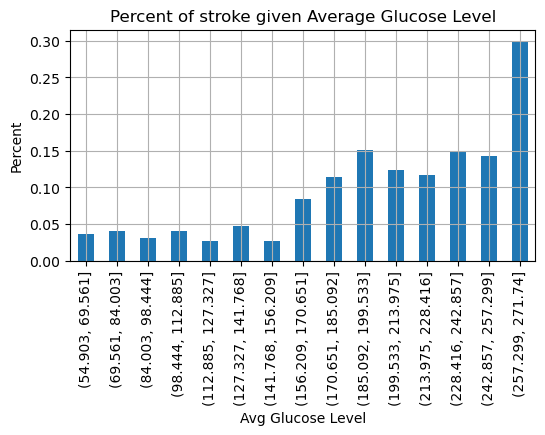

In [19]:
stroke_df = processed_stroke_data[processed_stroke_data['stroke'] == 1]

fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.histplot(data=processed_stroke_data, x='avg_glucose_level', hue='stroke', stat='percent', bins=15, multiple='stack')
ax.set_title('Frequency of stroke based on Average Glucose Level')
ax.set_xlabel('Average Glucose Level')
ax.set_ylabel('Percent')
ax.grid(True)

fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.histplot(data=stroke_df, x='avg_glucose_level', bins=15)
ax.set_title('Count of people with stroke based on Average Glucose Level')
ax.set_xlabel('Glucose Level')
ax.set_ylabel('Count')
ax.grid(True)

processed_stroke_data['avg_glucose_level_bin'] = pd.cut(processed_stroke_data['avg_glucose_level'], bins=15)
stroke_percents = (processed_stroke_data.groupby('avg_glucose_level_bin')['stroke'].mean())

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
stroke_percents.plot(kind='bar')
ax.set_title('Percent of stroke given Average Glucose Level')
ax.set_xlabel('Avg Glucose Level')
ax.set_ylabel('Percent')
ax.grid(True)

C:\Users\tchev\AppData\Local\Temp\ipykernel_23032\4075619510.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_stroke_df['bmi_bin'] = pd.cut(reduced_stroke_df['bmi'], bins=8)
C:\Users\tchev\AppData\Local\Temp\ipykernel_23032\4075619510.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_percents = (reduced_stroke_df.groupby('bmi_bin')['stroke'].mean())


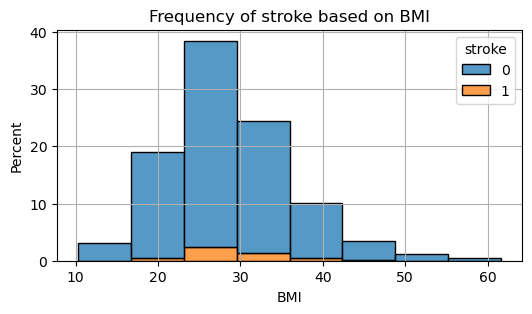

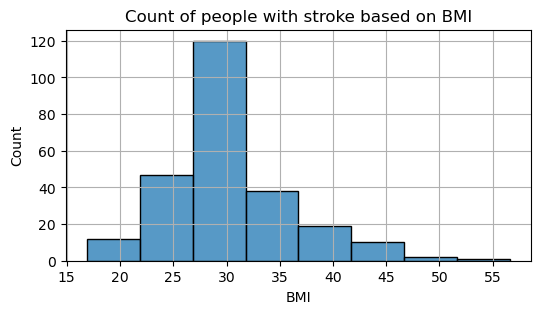

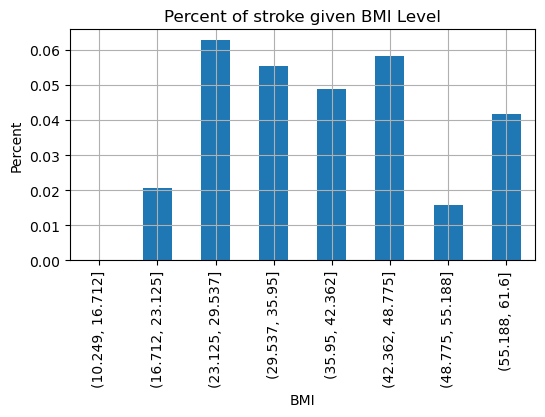

In [20]:
stroke_df = processed_stroke_data[processed_stroke_data['stroke'] == 1]
reduced_stroke_df = processed_stroke_data[processed_stroke_data['bmi'] <= 63]

fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.histplot(data=reduced_stroke_df, x='bmi', hue='stroke', stat='percent', bins=8, multiple='stack')
ax.set_title('Frequency of stroke based on BMI')
ax.set_xlabel('BMI')
ax.set_ylabel('Percent')
ax.grid(True)

fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.histplot(data=stroke_df, x='bmi', bins=8)
ax.set_title('Count of people with stroke based on BMI')
ax.set_xlabel('BMI')
ax.set_ylabel('Count')
ax.grid(True)

reduced_stroke_df['bmi_bin'] = pd.cut(reduced_stroke_df['bmi'], bins=8)
stroke_percents = (reduced_stroke_df.groupby('bmi_bin')['stroke'].mean())

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
stroke_percents.plot(kind='bar')
ax.set_title('Percent of stroke given BMI Level')
ax.set_xlabel('BMI')
ax.set_ylabel('Percent')
ax.grid(True)

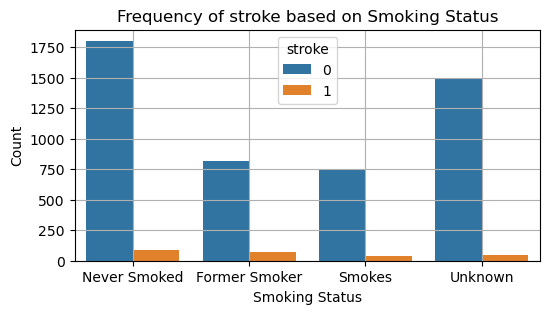

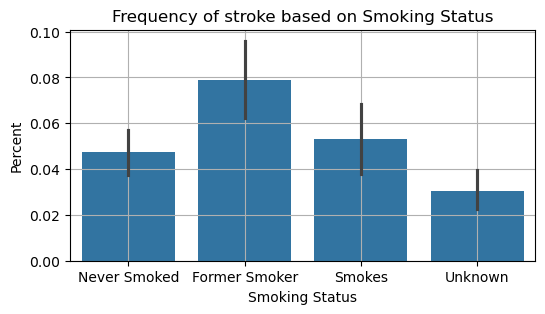

In [21]:
x_indexes = [0, 1, 2, 3]
x_labels = ['Never Smoked', 'Former Smoker', 'Smokes', 'Unknown']
fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.countplot(data=processed_stroke_data, x='smoking_status', hue='stroke')
plt.xticks(x_indexes, x_labels)
ax.set_title('Frequency of stroke based on Smoking Status')
ax.set_xlabel('Smoking Status')
ax.set_ylabel('Count')
ax.grid(True)

fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.barplot(data=processed_stroke_data, x='smoking_status', y='stroke')
plt.xticks(x_indexes, x_labels)
ax.set_title('Frequency of stroke based on Smoking Status')
ax.set_xlabel('Smoking Status')
ax.set_ylabel('Percent')
ax.grid(True)

## Analysis of 1+ Algorithm/Model

We decided to implement naive bayes for our first algorithm. We decided to run three different variants to see what works bettter, and to help us come up with a plan of what were going to tweak.

For the first rendition, we used all the original features and just ran it through the model. For the first variant, we dropped gender, heart disease, residence type and smoking status from the feature list. Finally, for the second variant we only used age,hypertension, bmi and smoking status.

We found that the difference in accuracy between the original and its variance is negligibile, though variant two has a slight edge. As for F1 scores, variant one is the best score of the three. Referencing the Class likelihood ratios, the feautures generally do better with classifying true positives vs classifying true negatives. Even with that, variant two has the highest LR+ score.

We'll most likely preform dimensionality reduction and feature engineering to try and get better results.

## Next Steps

Because we are moving to the final phase of the project, the biggest goals we are pursuing are implementing our third model, performing evaluation by comparing all three models, and preparing final report and presentation. Here are the next steps in detail:

* **Model 3 (M3) Design & Selection**: Our team is going to decide what third ML algorithm we are going to use. (e.g. Decision Tree, Gradient Boosting, etc.). We will jusfity the selection based on the prior performance.
* **Data Cleaning & Preparation**: Our team will apply preprocessing steps that are already existing and adapt if needed. The components that we will consider are M3's scaling or sensitivity.
* **Visualization**: We will explore how M3 will proceess data using plots such as boundaries of decision, partial dependence, or feature importances.
* **Feature reduction**: We will perform correlation analysis, recursive feature elimination, or PCA if it is beneficial for M3.
* **Implementation & Coding**: Our team will train and adjust our model using libraries that are suitable.
* **Evaluation**: We will assess M3 as the same as M1, M2 to make better, more consistent comparison.

### Comparing models & Analysis 
For M1, M2, and M3, we are going to compare all three models, Naive Bayes, SVM, and M3. We will check strengths and limitations, by comparing their simplicity, accuracy, interpretability. After, we will work on the final report and video creation.